In [176]:
# Dow Jones data from Alpha Vantage
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = 20, 10
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&'
company = 'DJI'
apikey = 'VEFDWP457ED915DE'
datatype = '&datatype=csv'
size = '&outputsize=full'
query_url = url+'&symbol='+company+size+'&apikey='+apikey

data = requests.get(query_url).json()
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'DJI',
  '3. Last Refreshed': '2019-12-09',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2019-12-09': {'1. open': '27987.0996',
   '2. high': '28010.4199',
   '3. low': '27906.1406',
   '4. close': '27909.5996',
   '5. volume': '219073850'},
  '2019-12-06': {'1. open': '27839.6797',
   '2. high': '28035.8496',
   '3. low': '27839.6797',
   '4. close': '28015.0605',
   '5. volume': '223310000'},
  '2019-12-05': {'1. open': '27736.0508',
   '2. high': '27745.1992',
   '3. low': '27562.8008',
   '4. close': '27677.7891',
   '5. volume': '208600000'},
  '2019-12-04': {'1. open': '27634.6309',
   '2. high': '27727.4492',
   '3. low': '27612.0801',
   '4. close': '27649.7793',
   '5. volume': '218200000'},
  '2019-12-03': {'1. open': '27501.9805',
   '2. high': '27524.7402',
   '3. low': '27325.1309',
   '4. close': '27502.8105',
   '5. volume': 

In [153]:
daily = []
date = []

tsd = data['Time Series (Daily)']
                 
for day in tsd.keys():
    daily.append(tsd[day]['4. close'])
    date.append(day)

dp= pd.DataFrame({'Date':date,'Dow Jones':daily})
dp.to_csv('../Wolverines/dow_api.csv')
dp.head()
dp['Date']=pd.to_datetime(dp['Date'])
dp['Dow Jones']=pd.to_numeric(dp['Dow Jones'])
dp.dtypes

Date         datetime64[ns]
Dow Jones           float64
dtype: object

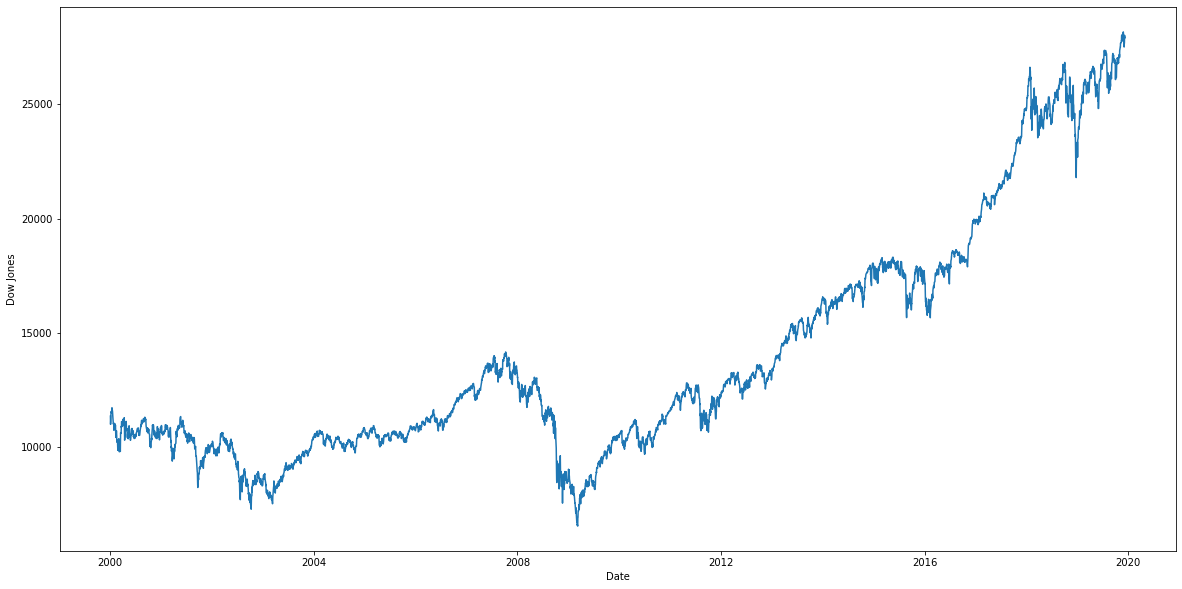

In [179]:
#dow bar graph
plt.plot(dp['Date'],dp['Dow Jones'])
plt.xlabel("Date")
plt.ylabel("Dow Jones")
plt.show()

In [184]:
import quandl
quandl.ApiConfig.api_key = "spA_SVgtVY6tt65-K2kv"
oil = quandl.get("EIA/PET_RWTC_D",start_date="2010-01-01", end_date="2019-12-09")
crude_oil = oil.rename(columns={"Value":'Oil Price'})
crude_oil.to_csv('../Wolverines/crude_oil_api.csv')
oil

,Value
Date,
2010-01-04,81.52
2010-01-05,81.74
2010-01-06,83.12
2010-01-07,82.60
2010-01-08,82.74
...,...
2019-11-22,57.68
2019-11-25,57.79
2019-11-26,58.25


In [155]:
final = pd.merge(crude_oil, dp, on="Date", how="inner")

In [185]:

final.to_csv('../Wolverines/oil&dow.csv')
final.head()

,Date,Oil Price,Dow Jones
0,2010-01-04,81.52,10583.9600
1,2010-01-05,81.74,10572.0195
2,2010-01-06,83.12,10573.6797
3,2010-01-07,82.60,10606.8604
4,2010-01-08,82.74,10618.1904


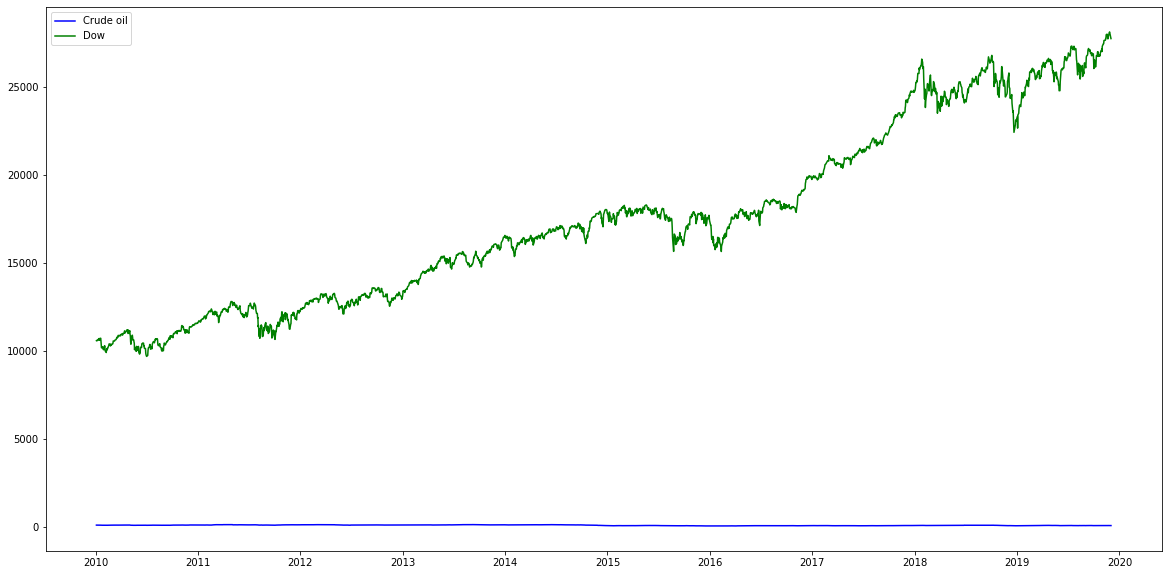

In [181]:
# Plot the Crude oil as a line chart
Crude_oil, = plt.plot(final['Date'], final['Oil Price'], color="blue", label="Crude oil" )

# Plot the Dow Jones values as a line chart
Dow_Jones, = plt.plot(final['Date'], final['Dow Jones'], color="green",label="Dow")

# Create a legend for our chart
plt.legend(handles=[Crude_oil, Dow_Jones], loc="best")

# Show the chart
plt.show()

# Two line graphes don't fit into one figure

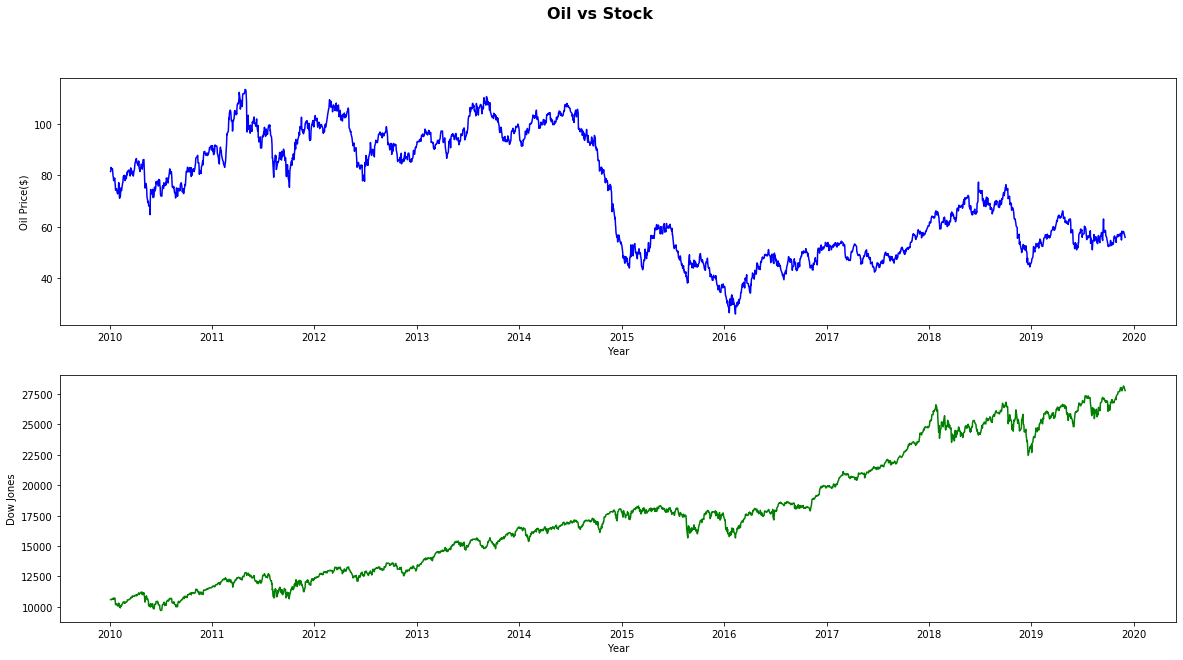

In [183]:
fig, (ax1, ax2) = plt.subplots(2,1)


fig.suptitle("Oil vs Stock", fontsize=16, fontweight="bold")

ax1.plot(final['Date'], final['Oil Price'], color="blue", label="Crude oil" )
ax1.set_xlabel("Year")
ax1.set_ylabel("Oil Price($)")


ax2.plot(final['Date'], final['Dow Jones'], color="green",label="Dow")
ax2.set_xlabel("Year")
ax2.set_ylabel("Dow Jones")
plt.savefig("oilvsstock.png")
plt.show()